In [1]:
scores = '../out/yeasts_scores.txt'

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=12)

In [3]:
# other imports
import random
import itertools
import numpy as np
import pandas as pd
from scipy import cluster
import fastcluster as fst
import matplotlib.patches as patches

In [4]:
m = pd.read_table(scores, index_col=[0, 1]).sort_index()
m['phenotype'] = m['qvalue'] < 0.05
m['pos-phenotype'] = (m['qvalue'] < 0.05) & (m['score'] > 0)
m['neg-phenotype'] = (m['qvalue'] < 0.05) & (m['score'] < 0)
p = m.pivot_table(index='strain',
                  columns='condition',
                  values='score')

In [5]:
c = p.copy(deep=True)
c[np.isnan(c)] = 0.
rl = fst.linkage(c, method='average')
cl = fst.linkage(c.T, method='average')
cmap = sns.diverging_palette(76, 217, l=89, n=100, center="dark", as_cmap=True)
cmap.set_bad(sns.xkcd_rgb['grey'], alpha=0.55)

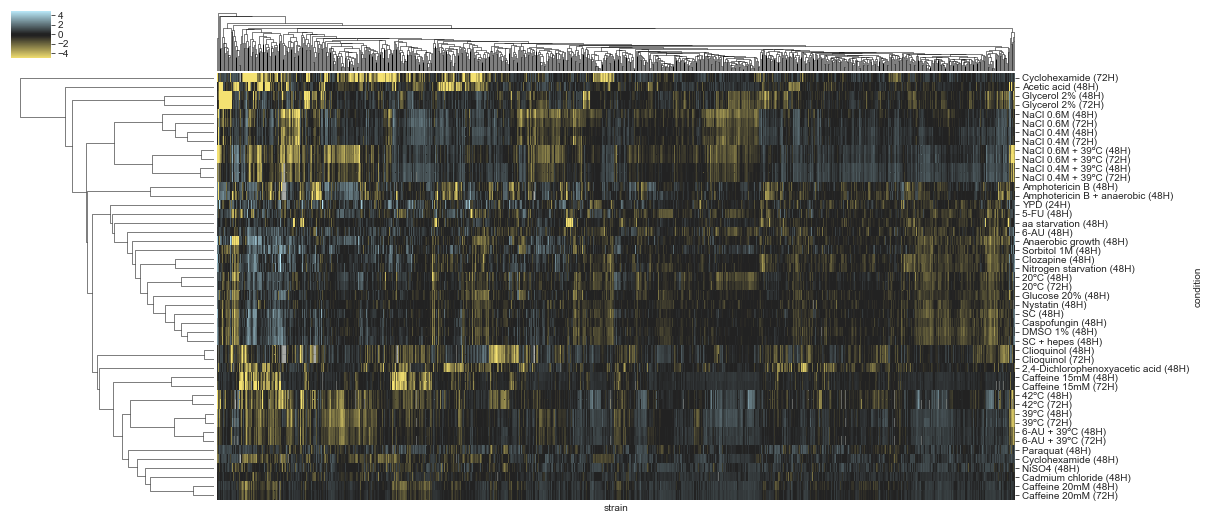

In [6]:
mclust = sns.clustermap(p.T,
                        cmap=cmap,
                        vmax=5,
                        vmin=-5,
                        xticklabels=False,
                        yticklabels=True,
                        row_linkage=cl,
                        col_linkage=rl,
                        figsize=(18, 9));

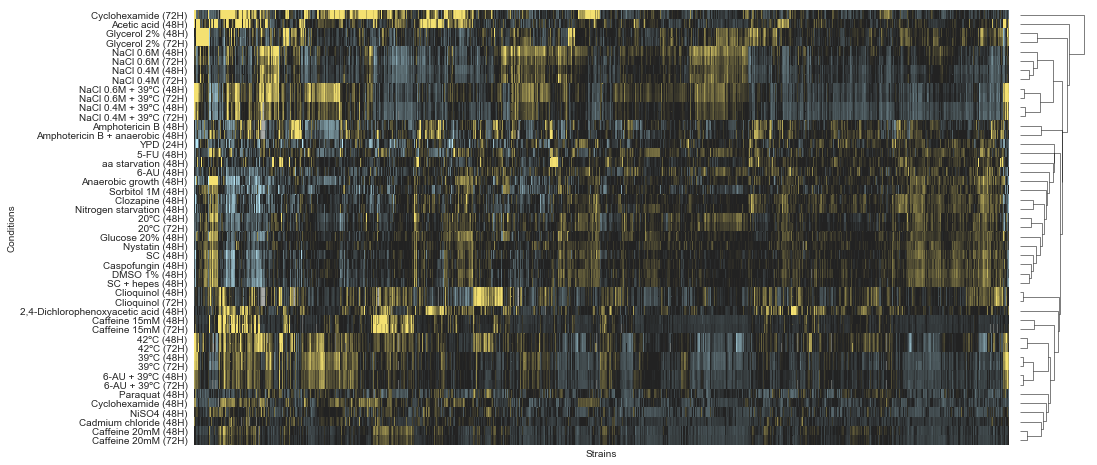

In [7]:
plt.figure(figsize=(16, 8))

gs = plt.GridSpec(1, 2,
                  wspace=0.025,
                  width_ratios=[8, 0.66])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

plt.sca(ax1)
yticklabels = True
hm = sns.heatmap(mclust.data2d,
                 cmap=cmap,
                 vmax=4,
                 vmin=-4,
                 yticklabels=yticklabels,
                 xticklabels=False,
                 cbar=False)
plt.xlabel('Strains')
ax1.collections[0].set_rasterized(True)
plt.ylabel('Conditions')
plt.yticks(rotation=0)

plt.sca(ax2)
with plt.rc_context({'lines.linewidth': 0.5}):
    cluster.hierarchy.dendrogram(cl, no_plot=False,
                                 color_threshold=-np.inf,
                                 above_threshold_color='k',
                                 orientation='right',
                                 no_labels=True)
plt.xticks([])
plt.gca().invert_yaxis()

sns.despine(bottom=True,
            left=True);

plt.savefig('heatmap_natural.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('heatmap_natural.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);